### 8-2

In [14]:
import numpy as np
import copy

A = np.random.randn(4,4)

#그람-슈미트 과정
def gs(A):
    Q = copy.copy(A)
    u1 = Q[:,0]
    Q[:,0] = Q[:,0] / (Q[:,0]@Q[:,0]) ** 0.5
    
    #u1에 대해 v2 사영
    v2 = Q[:,1]
    proj = ((u1 @ v2) / (u1@u1)) *u1 #u1공간에 있는 사영된 벡터
    u2 = v2 - proj #직교 벡터
    Q[:,1] = u2 / (u2@u2) **0.5
    
    v3 = Q[:,2]
    proj1 = ((u1 @ v3)/(u1@u1)) *u1
    u3_1 = v3-proj1
    proj2 = ((u2 @ u3_1)/(u2@u2)) *u2
    u3 = u3_1-proj2
    Q[:,2] = u3/(u3@u3) **0.5
    
    v4 = Q[:,3]
    proj3 = ((u1 @ v4)/(u1@u1)) *u1
    u4_1 = v4-proj3
    proj4 = ((u2 @ u4_1)/(u2@u2)) *u2
    u4_2 = u4_1-proj4
    proj5 = ((u3 @ u4_2)/(u3@u3)) *u3
    u4 = u4_2-proj5
    Q[:,3] = u4/(u4@u4) **0.5
    
    return Q

print(gs(A), ' ')
print(np.linalg.qr(A)[0])

[[ 0.54326436 -0.01575789  0.59498873 -0.59211818]
 [-0.4880434   0.10544202 -0.34327634 -0.79552309]
 [-0.58600812  0.43365665  0.67266407  0.12672589]
 [-0.35110108 -0.89474889  0.27508693 -0.02190056]]  
[[-0.54326436  0.01575789 -0.59498873  0.59211818]
 [ 0.4880434  -0.10544202  0.34327634  0.79552309]
 [ 0.58600812 -0.43365665 -0.67266407 -0.12672589]
 [ 0.35110108  0.89474889 -0.27508693  0.02190056]]


In [15]:
gs(A)-np.linalg.qr(A)[0]

array([[ 1.08652871, -0.03151579,  1.18997747, -1.18423635],
       [-0.97608679,  0.21088405, -0.68655267, -1.59104617],
       [-1.17201623,  0.8673133 ,  1.34532813,  0.25345178],
       [-0.70220216, -1.78949778,  0.55017386, -0.04380113]])

In [17]:
gs(A)+np.linalg.qr(A)[0]

array([[ 0.00000000e+00, -1.04083409e-16,  1.11022302e-16,
        -1.11022302e-16],
       [ 0.00000000e+00,  2.77555756e-17, -5.55111512e-17,
        -2.22044605e-16],
       [ 0.00000000e+00,  1.11022302e-16,  0.00000000e+00,
         8.32667268e-17],
       [ 0.00000000e+00, -1.11022302e-16, -5.55111512e-17,
         3.81639165e-16]])

### 8-3

In [30]:
A = np.random.randn(6,6)
U = np.linalg.qr(A)[0]

I = np.linalg.qr(U)[1]
print(I)

[[ 1.00000000e+00  3.46944695e-17  1.38777878e-16 -5.55111512e-17
   0.00000000e+00 -2.22044605e-16]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.11022302e-16
   2.22044605e-16  1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -8.32667268e-17 -5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.24900090e-16 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00 -2.01227923e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


##### U가 이미 직교행렬이기 때문에 직교화했을 때 변화하는 것이 없다. R은 직교행렬인 U가 자신의 전치와 곱하는 것과 같기 때문에 단위행렬이 된다.

In [31]:
U[:,0] = 10* U[:,0]/(U[:,0]@U[:,0])**0.5
U[:,1] = 11* U[:,1]/(U[:,1]@U[:,1])**0.5
U[:,2] = 12* U[:,2]/(U[:,2]@U[:,2])**0.5
U[:,3] = 13* U[:,3]/(U[:,3]@U[:,3])**0.5
U[:,4] = 14* U[:,4]/(U[:,4]@U[:,4])**0.5
U[:,5] = 15* U[:,5]/(U[:,5]@U[:,5])**0.5

R = np.linalg.qr(U)[1]
print(R)

[[ 1.00000000e+01  2.77555756e-16  1.33226763e-15 -3.55271368e-15
  -2.66453526e-15 -1.77635684e-15]
 [ 0.00000000e+00  1.10000000e+01 -8.88178420e-16  8.88178420e-16
   5.32907052e-15 -8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  1.20000000e+01  1.77635684e-15
  -4.44089210e-16 -8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.30000000e+01
  -7.77156117e-16 -1.77635684e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.40000000e+01 -6.55031585e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.50000000e+01]]


##### 대각원소가 10~15인 대각행렬이다.

In [27]:
Q = np.linalg.qr(U)[0]
Q@Q

array([[-0.43609065, -0.43230545,  0.26484504, -0.39916565, -0.5796387 ,
         0.23974948],
       [-0.41148424,  0.36400161, -0.16998776,  0.49393833, -0.534356  ,
        -0.37386669],
       [-0.02269458,  0.79943377,  0.00484834, -0.54064997, -0.10603105,
         0.23837393],
       [ 0.29730299, -0.11105611, -0.72029243,  0.10623821, -0.33288135,
         0.508291  ],
       [-0.6958653 , -0.07508452, -0.50587019, -0.1705637 ,  0.47407003,
         0.01986899],
       [-0.25956315,  0.15345792,  0.35526318,  0.51381981,  0.17801031,
         0.69797367]])

In [29]:
U[1,4] = 0

R = np.linalg.qr(U)[1]
print(R)

[[ 1.00000000e+01 -1.77635684e-15  1.77635684e-15  8.88178420e-16
  -9.29972734e-02  2.22044605e-16]
 [ 0.00000000e+00  1.10000000e+01  0.00000000e+00  3.55271368e-15
   7.47299551e-01 -3.55271368e-15]
 [ 0.00000000e+00  0.00000000e+00  1.20000000e+01  1.99840144e-15
   1.48842139e-01  3.55271368e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.30000000e+01
   6.28332899e-01  1.77635684e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.39261657e+01 -3.19267601e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.49966019e+01]]


##### 상삼각행렬이 됐다. U가 직교행렬이 아니니, 일반 행렬로 QR분해를 한 결과의 R은 상삼각행렬이다.

### 8-7

In [34]:
A = np.random.randn(10,4)
R = np.linalg.qr(A,'complete')[1]
print(R)

[[ 1.81872157  0.14243825  0.6719111  -0.19024206]
 [ 0.          3.04972163 -0.72690376 -0.22274659]
 [ 0.          0.         -2.47285235  1.52492105]
 [ 0.          0.          0.          2.70896258]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [40]:
R1 = R[:4,:]

R1_inv = np.linalg.inv(R1)

RtR = R.T@R
RtR_inv = np.linalg.inv(RtR)
R_ginv = RtR_inv@R.T

print(R_ginv[:,:4]-R1_inv)

[[ 0.00000000e+00 -2.77555756e-17  0.00000000e+00 -6.93889390e-18]
 [-1.27425941e-17  1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [-2.25705576e-17  7.66944045e-18 -5.55111512e-17  2.77555756e-17]
 [-2.79791386e-18 -5.80776667e-18 -3.71821182e-17  0.00000000e+00]]


##### R의 처음 4행의 완전역행렬 = R의 의사 역행렬의 처음 4열

### 9-2

In [43]:
matrix1 = np.random.randn(6,3)
matrix2 = np.random.randn(3,8)

A = matrix1@matrix2

print(np.linalg.matrix_rank(A))

3


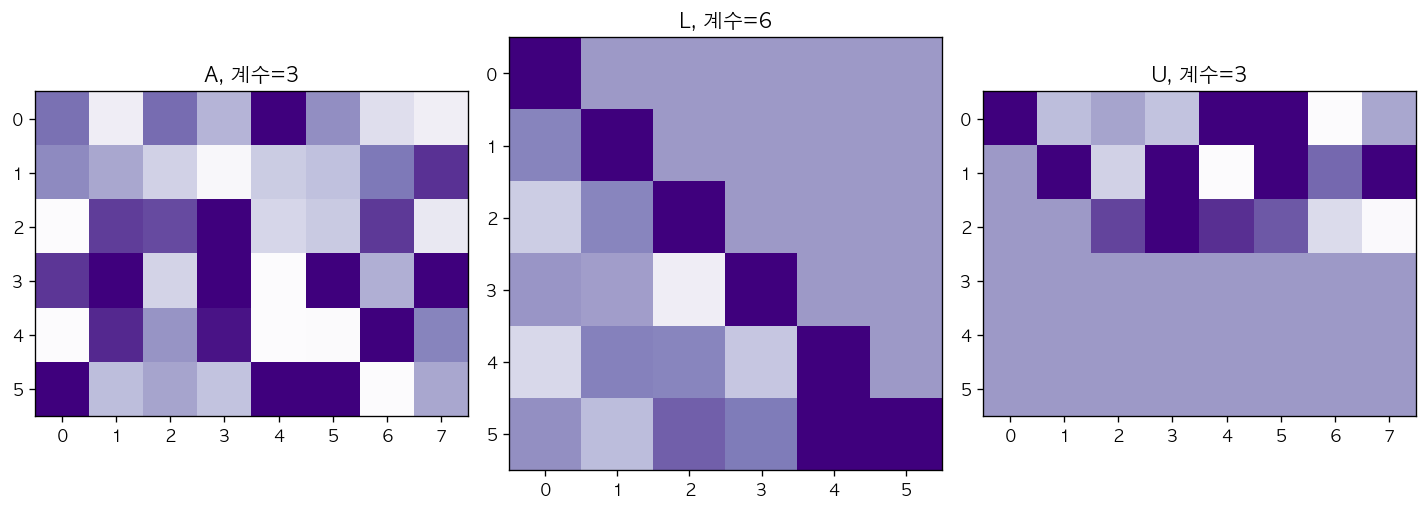

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
print(plt.rcParams['font.family'])

plt.rcParams.update({'font.family' : 'AppleGothic', #한글 폰트
                   'figure.dpi' : '120', #해상도
                   'figure.figsize' : [6.5, 6]}) # 가로 세로 크기

import scipy.linalg
P,L,U = scipy.linalg.lu(A)

# 행렬 그리기
_,axs = plt.subplots(1,3,figsize=(12,7))

axs[0].imshow(A,vmin=-1,vmax=1,cmap='Purples')
axs[0].set_title(f'A, 계수={np.linalg.matrix_rank(A)}')

axs[1].imshow(L,vmin=-1,vmax=1,cmap='Purples')
axs[1].set_title(f'L, 계수={np.linalg.matrix_rank(L)}')

axs[2].imshow(U,vmin=-1,vmax=1,cmap='Purples')
axs[2].set_title(f'U, 계수={np.linalg.matrix_rank(U)}')

plt.tight_layout()
plt.show()

In [49]:
np.round(L,2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.18,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.38,  0.17,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.04, -0.03, -0.75,  1.  ,  0.  ,  0.  ],
       [-0.49,  0.21,  0.17, -0.33,  1.  ,  0.  ],
       [ 0.09, -0.25,  0.42,  0.25,  1.  ,  1.  ]])

### 9-3

In [56]:
A = np.random.randn(5,5)

P,L,U = scipy.linalg.lu(A)

diags = np.diag(U)
det = np.prod(diags)*np.linalg.det(P)

print(np.linalg.det(A), det)
print(np.linalg.det(A)-det)

6.467563077367918 6.4675630773679185
-8.881784197001252e-16


### 9-4

In [66]:
A = np.random.randn(4,4)

P,L,U = scipy.linalg.lu(A)

A_inv = np.linalg.inv(A)
U_inv = np.linalg.inv(U)
L_inv = np.linalg.inv(L)

lu_inv = U_inv@L_inv@P.T
print(A_inv-lu_inv)

[[-1.38777878e-17  1.38777878e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11022302e-16  0.00000000e+00  5.55111512e-17]
 [ 2.77555756e-17  0.00000000e+00  0.00000000e+00 -1.38777878e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [65]:
np.round(A@lu_inv,10)

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0.,  0., -0.,  1.]])